# Overview 
During this course, we will mainly use 3 python modules: 
- **numpy** (basic matrix operation in python), 
- **matplotlib** (to make nice figures and plots in python), 
- **pytorch** (deep learning module)

With this notebook, we will focus on numpy and matplotlib. 


#  Preliminary : Notebooks

In this course, most of the lab sessions will use jupyter-notebook. 
 

Concerning the notebooks, you need to know that:
- It's a set of cells, each cell has its type. **Markdown** is for text (like this one) and **code** is for python (like the next one). 
- A markdown cell can be executed to get a nice display of its content. 
- A code cell can be executed and the result (the std-output and std-err) follows the cell. 
- Cells are easy to create, delete, split, move and execute. 
- You can execute the cells in the order you want, but the consistency relies on you. 
- To help you, on the left of each code cell, it is writte, depending on what you have done so far: 
    - "In [    ]" : the cell has not been ran yet
    - "In [ 3 ]" : this is the 3rd cell you ran
    - "In [ \* ]" : this cell is running
    
Behind every notebook runs a kernel (a python interpreter). When you run a code cell, that code is executed within the kernel and any output is returned back to the cell to be displayed. The kernel’s state persists over time and between cells — it pertains to the document as a whole and not individual cells.

[This page](https://guides.github.com/features/mastering-markdown/) provides an overview of Markdown and its main features. 

Be sure, you understand the user-interface of the notebook. For instance, go through [this page](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) and make sure to know how to : 
- create/insert a markdown cell and a code cell
- edit and run them
- move a cell up and down 
- delete and split a cell
- merge cells 

## Good practice

Using notebooks allows us to take note and to code within the same interface. It is also a nice framework to learn, to experiment and to write experimental study. The provided notebooks are therefore just a *starting document* and now play with it, transform it, write code and take notes. 

However, it is important to remember to code nicely in python. While this programming language enables flexibility,  the coding style is important to ensure efficiency:  
- use explicit names for variables and functions;
- all numerical values must be stored in variables;
- define function whenever it is useful (don't be lazy);
- **Document** your code with useful **comments** ! It is mandatory for functions 



## Help 

For help, you can use the help function for a type or a method. 

In [29]:
a = list()
help(a.append) # provides help for the method append of the class list
# Try help(a)
a.append()


Help on built-in function append:

append(...) method of builtins.list instance
    L.append(object) -> None -- append object to end



TypeError: append() takes exactly one argument (0 given)

However remember that you can use the completion with the **tab** key. You can also prompt help when typing with the combined keys **shift+tab**. 

# NumPy (for matlab users)

**NumPy** and SciPy are designed to do numerical and scientific computing in the most natural way with Python, not to mimic MATLAB. However, they share a lot things, with some differences. The most important ones are the following.  

## Data type
In MATLAB, the basic data type is a multidimensional array of double precision floating point numbers. Most expressions take and return such arrays. Operations on the 2-D instances of these arrays are designed to act more or less like matrix operations in linear algebra. 	

**In NumPy** the basic type is a multidimensional array. Operations on these arrays in all dimensionalities including 2D are element-wise operations. By default, the *float* and *int* are coded on 64 bits. Note you can specify the data-type with dtype. One needs to use specific functions for linear algebra (though for matrix multiplication, one can use the @ operator since python 3.5).



In [30]:
# Start with import. 
import numpy as np


## Indexing and view 

MATLAB uses 1 (*one*) based indexing. The first element of a sequence is  a(1). Python uses 0 (*zero*) based indexing, and the first element is a[0]. Furthermore in NumPy, arrays have pass-by-reference semantics. Slice operations are views into an array.


In [31]:
np.random.seed(1) # to get everytime the same results
# array creation 
a = np.ones((3,4),dtype=np.float)
print("matrix a =\n", a , "\n - of type ", 
      a.dtype, "\n - of dimensions " ,a.shape)
# You can use the automatic completion to see all the available float type
# Try with integers: 
a = np.ones((3,2),dtype=np.int)
print("matrix a =\n", a , "\n - of type ", 
      a.dtype, "\n - of dimensions " ,a.shape)
# Creation of a random matrix
b = np.random.rand(3,2)
print("matrix b =\n", b , "\n - of type ", 
      b.dtype, "\n - of dimensions " ,b.shape)

print("element-wise multiplication:\n",a*b) # equivalent np.multiply(a,b)
print("matrix multiplication:\n", a@b.T) #  a.dot(b.T) and np.dot(a,b.T)
# Why do we need to transpose b in the last operation ? Try a@b ? 


# slicing is only a view : c is a view on the data of b
c = b[1:3,:]                                             #takes row 1 until 3, and take all columns
print("c =\n", c) 
c[0,0] = 9999
print("b =\n", b)
# We can use negative index in python 
d = b[-1,:]
print("d =\n",d)

matrix a =
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]] 
 - of type  float64 
 - of dimensions  (3, 4)
matrix a =
 [[1 1]
 [1 1]
 [1 1]] 
 - of type  int32 
 - of dimensions  (3, 2)
matrix b =
 [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]] 
 - of type  float64 
 - of dimensions  (3, 2)
element-wise multiplication:
 [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]]
matrix multiplication:
 [[1.1373465  0.30244695 0.23909449]
 [1.1373465  0.30244695 0.23909449]
 [1.1373465  0.30244695 0.23909449]]
c =
 [[1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]]
b =
 [[4.17022005e-01 7.20324493e-01]
 [9.99900000e+03 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]]
d =
 [0.14675589 0.09233859]


Useful information about a numpy array are : 
- the shape and dtype (attributes)
- np.ndim(a) or a.ndim: get the number of dimensions of an array
- np.size(a) or a.size: get the number of elements of an array
- or call np.info on a variable to get (almost) everything
- reminder: test the python functions *type*, *id* 


In [32]:
a= np.diag(np.linspace(-1,1,4))
np.info(a)
print(a)
b = a 
b[0,0] = 2
print("*** ids : ", id(a),id(b))
print(a)

class:  ndarray
shape:  (4, 4)
strides:  (32, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1db18a3a890
byteorder:  little
byteswap:  False
type: float64
[[-1.          0.          0.          0.        ]
 [ 0.         -0.33333333  0.          0.        ]
 [ 0.          0.          0.33333333  0.        ]
 [ 0.          0.          0.          1.        ]]
*** ids :  2040575510928 2040575510928
[[ 2.          0.          0.          0.        ]
 [ 0.         -0.33333333  0.          0.        ]
 [ 0.          0.          0.33333333  0.        ]
 [ 0.          0.          0.          1.        ]]


## Function template 

Here you can find a template for functions. The function itself is not interesting, but syntax is important: 
- The "header" of a definition starts with **def**, followed by the name of the function (*sumOfOddTerms* in our case) and a list of the arguments (here only one argument,*m*, is passed to the function). The header ends with **:** and the body of the function is indented. 
- The special comments between 3 double quotes (""" the special comment""") is important ! It follows the header. More than a string with many lines, its text is used for further help. At least, describe the inputs and outputs of the function. 
- The name must be as explicit as possible. 
- The *return* statement allows your function to return an object. By default it is None. 


In [43]:
def sumOfOddTerms(m):
    """
    This function compute the sum of the odd terms in the matrix m
    
    input: 
        - m is numpy array of integers (np.int64)
    returns: 
        - an int: the sum of odd terms in m
    """
    assert(m.dtype == np.int64) # check the input
    return m[m%2==1].sum()
    


Always test your function. Here is a minimum example: 

In [47]:
a = np.random.randint(-20,20,(5,5),dtype=np.int64) #bizarro, precisamos forçar o bagulho a se tornar um inteiro
b = np.zeros(9,dtype=np.int64)
print(a)
print("sum of odd terms: ",sumOfOddTerms(a))
help(sumOfOddTerms)

[[ -1   6   2 -13  15]
 [ 14  16  16  12  -1]
 [-17   4  -1  17  10]
 [ 18  19 -15  -5   3]
 [ 12 -10 -18   4  14]]
sum of odd terms:  1
Help on function sumOfOddTerms in module __main__:

sumOfOddTerms(m)
    This function compute the sum of the odd terms in the matrix m
    
    input: 
        - m is numpy array of integers (np.int64)
    returns: 
        - an int: the sum of odd terms in m



A function can work *in-place*. In the following example, the function set to zero all the odd numbers of a matrix given as argument. Moreover, a function can have several arguments. 

In [48]:
def zeroOddTerms(m, even = False): 
    """
    Set to zero the odd terms of a matrix m 
    If the argument even is et to True, this is the opposite: the even terms are set to zero
    
    input: 
        - m is numpy array of integers (np.int64)
    returns: 
        - None, the matrix m is modified
    """
    if even is True: 
        m[m%2==0] = 0 # um pouco burrice, precisamos mudar even para True para zerar os termos pares (even)
    else : # the default case, set odd terms to 0
        m[m%2==1] = 0


In [51]:
a = np.random.randint(-20,20,(5,5))
print(a)
print(zeroOddTerms(a))
print(a)
print ("********************")
a = np.random.randint(-20,20,(5,5))
print(a)
# when you call a function, it can be more readable 
# if some args are explicitely named. 
print(zeroOddTerms(a,even=True)) 
print(a)

[[  9  16  -4   7 -12]
 [  8 -18  15  -7  16]
 [ 16  -2  13  18   5]
 [ 19  17 -18  14   8]
 [ -6  -9   6   1  -4]]
None
[[  0  16  -4   0 -12]
 [  8 -18   0   0  16]
 [ 16  -2   0  18   0]
 [  0   0 -18  14   8]
 [ -6   0   6   0  -4]]
********************
[[  8  17  -9   2 -14]
 [ 12  -6  16   3  -9]
 [ 15  12   7  18 -20]
 [  2  13 -14  16  -2]
 [  7   8  17  18  10]]
None
[[ 0 17 -9  0  0]
 [ 0  0  0  3 -9]
 [15  0  7  0  0]
 [ 0 13  0  0  0]
 [ 7  0 17  0  0]]


Finally a function can return several objects as a tuple. 

In [52]:
def separateOddAndEven(m): 
    """
    Create two matrices, one with the odd terms, and the other with the even terms. 
    
    input: 
        - m is numpy array of integers (np.int64)
    returns: 
        - Two arrays of the same size as m the input. 
          The first contains the odd terms (the even ones are set to 0) 
          and the second is the opposite. 
    """
    oddPart  = np.copy(m)
    oddPart[oddPart%2==0]=0
    evenPart  = np.copy(m)
    evenPart[evenPart%2==1]=0
    return oddPart, evenPart

In [53]:
a = np.random.randint(-20,20,(5,5))
print(a)
oa, ea = separateOddAndEven(a)
print("odd part :\n",oa)
print("even part:\n",ea)
print("putting everything together:\n", oa+ea)

[[-13   1  -4  19   9]
 [ -9  -6  10 -12  10]
 [  3 -18   8 -20  19]
 [ -8  -3  13 -10   8]
 [ -9 -15  -3 -15   2]]
odd part :
 [[-13   1   0  19   9]
 [ -9   0   0   0   0]
 [  3   0   0   0  19]
 [  0  -3  13   0   0]
 [ -9 -15  -3 -15   0]]
even part:
 [[  0   0  -4   0   0]
 [  0  -6  10 -12  10]
 [  0 -18   8 -20   0]
 [ -8   0   0 -10   8]
 [  0   0   0   0   2]]
putting everything together:
 [[-13   1  -4  19   9]
 [ -9  -6  10 -12  10]
 [  3 -18   8 -20  19]
 [ -8  -3  13 -10   8]
 [ -9 -15  -3 -15   2]]


## Summary 
[This page](http://mathesaurus.sourceforge.net/matlab-numpy.html) summarizes the link from matlab to numpy, if you need. 



# Matplotlib — Data Visualization in Python
    
The second module is matplotlib,  one of the most popular data visualization library in Python. 

## Basics 
There are two key components in a plot:  a Figure and Axes. The Figure is the top level container that acts as the window or page on which everything is drawn. It can contain multiple independent figures, multiple Axes, a subtitle (which is a centered title for the figure), a legend, a color bar, etc.

The Axes is the area on which we plot our data and any labels/ticks associated with it. Each Axes has an X-Axis and a Y-Axis




In [54]:
import matplotlib.pyplot as plt 

In a Jupyter notebook we can easily display plots using: 

In [55]:
%matplotlib inline

However, if you’re using Matplotlib from within a Python script, you have to add plt.show() method inside the file to be able display your plot. 

Aside comment: The code lines starting by **%** are built-in magic commands of ipython. This is not important for today. Someday, look at [this page](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to see all you can do or specify. 

Let start, by creating a 2D data set and plotting it. 

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


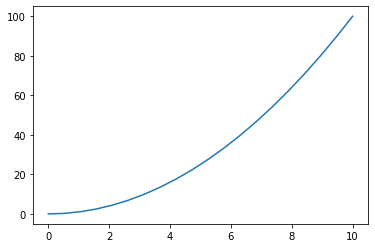

In [57]:
x = np.linspace(0,10,20)
print(x)
y = x**2
plt.plot(x,y)

Now that we have a plot, let’s go on to name the x-axis, y-axis, and add a title using .xlabel(), .ylabel() and .title(). 


Text(0.5, 1.0, 'Xablau')

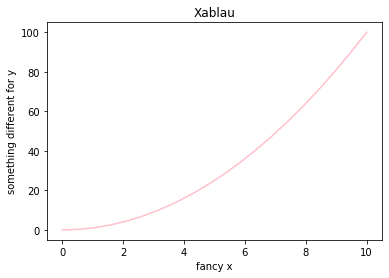

In [63]:
plt.plot(x,y,"pink")
plt.xlabel("fancy x")
plt.ylabel("something different for y")
plt.title("Xablau")

Note, each call work on the same figure. At any time you can clean the figure with plt.clf() or display the figure and clear it with plt.show() 

** Questions: **
- Create 2 functions to plot, one in red, one in blue.
- Create a single Figure with these two plots
- And two figures with these two plots
- Plot a single figure focusing on (0,10) for the x-axis (0,30) for the y-axis. 
All figures must have labels and titles. 


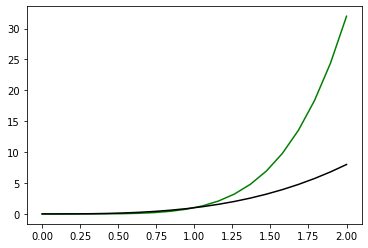

In [68]:
x=np.linspace(0,2,20)
y=x**5
y1=x**3
plt.plot(x,y,'green',x,y1,'black')




## Subplot 

If you want to plot different figures on the same canvas, matplotlib allows you to easily create multi-plots on the same figure using the *.subplot()* method. This method takes 3 parameters:
- nrows: the number of rows the Figure should have.
- ncols: the number of columns the Figure should have.
- plot_number : which refers to a specific plot in the Figure.

For instance: 


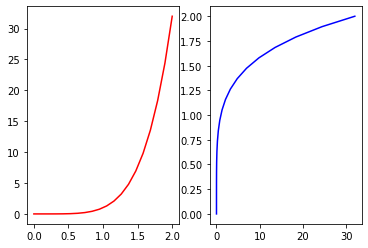

In [71]:
plt.subplot(1,2,1)
plt.plot(x,y,"red")
plt.subplot(1,2,2)
plt.plot(y,x,"blue")


## Playing with styles 

- [To see all the markers](https://matplotlib.org/api/markers_api.html)
- [For the colors](https://matplotlib.org/api/colors_api.html)

Here is an example: 


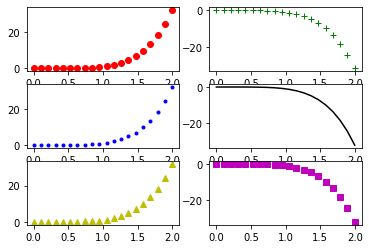

In [72]:
styles = ["ro", "g+", "b.", "k-", "y^", "ms"]
for i in range(len(styles)): 
    plt.subplot(3,2,i+1)
    plt.plot(x,((-1)**i)*y,styles[i])


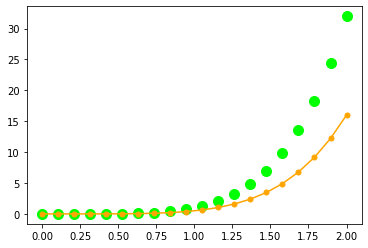

In [73]:
# more explicitely : 
plt.plot(x,y, linestyle = " ", marker = 'o', c = 'lime',  markersize = 10)
plt.plot(x,y*0.5, linestyle = "-", marker = 'o', c = 'orange',  markersize = 5)


Matplotlib allows us create customized plots by specifying the figure size, aspect ratio, and DPI by simply specifying the figsize and dpi arguments. The figsize is a tuple of the width and height of the figure (in inches), and dpi is the dots-per-inch (pixel-per-inch).


**Question:** make a  figure with width=8, height=2, and dpi=100

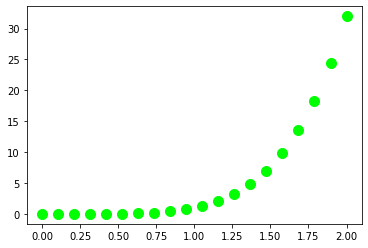

In [84]:
# TODO : write your code here (and remove this comment)
plt.plot(x,y, linestyle = " ", marker = 'o', c = 'lime',  markersize = 10)
# FAZER EM CASA

# At the end if you want to save the figure
plt.savefig("./toto.png", format="png")
# For more details try help(plt.savefig)


# A toy dataset

Here is a dataset used during courses.

In [99]:
ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 1 
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 2 
X = np.concatenate((ST1,ST2),axis=1)
print(X)
Y = np.ones(14)
print('*********************')
Y[7:] = 0
print(Y)

[[17.  12.  13.  15.  15.  20.  20.   4.   7.5 10.  11.   5.   5.   6. ]
 [10.  12.  14.  15.  20.  15.  20.   8.   5.   0.   5.   0.  10.   6. ]]
*********************
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


**Questions (read until the end to follow the guidelines):**
- plot the dataset as a scatter plot, with the first half in green and the second in red
- Wrap this code in a  function in which you can tune the styles for each half and set the span of the view
- Write a function that draws a line given its parameters on a specified region of the space. 
     

ValueError: x and y must have same first dimension, but have shapes (2, 7) and (5,)

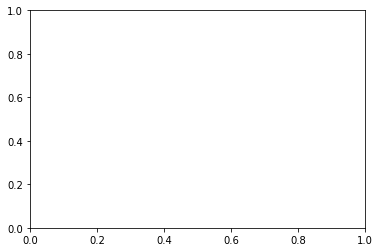

In [105]:
# TODO : write your code here (and remove this comment)
plt.plot(ST1,Y[1:6], linestyle = " ", marker = 'o', c = 'lime',  markersize = 10)
#FAZER DPS

### Good practice (one more): comment function

When you write a similar code many times, wrap it in a function. To make it useful, spend some time to comment the code. For example : 


In [89]:
def plot2DBinaryDataSet(D1, D2, xmin, xmax, ymin, ymax,st1='go',st2="ro"):
        """Plot a dataset made of 2D points. 
        The dataset is provided in 2 parts for the 2 classes: D1 and D2
        Args: 
            - D1: numpy array of size (2,N), N the number of points in the 1st class
            - D2: numpy array of size (2,M), M the number of points in the 2nd class
            - xmin,xmax,ymin,ymax : numbers to define the plot domain
            - st1 and st2: resp. the style for class 1 and 2
        
        Return: 
            None
        
        Assume : import matplotlib.pyplot as plt
        Here you can describe a bit more the function, how you code it 
        and the important assumptions, limitations, ... 
        """
        # Create the axis: 
        plt.axis([xmin,xmax,ymin,ymax])
        # TODO : finish the function 
  

In [90]:
help(plot2DBinaryDataSet)

Help on function plot2DBinaryDataSet in module __main__:

plot2DBinaryDataSet(D1, D2, xmin, xmax, ymin, ymax, st1='go', st2='ro')
    Plot a dataset made of 2D points. 
    The dataset is provided in 2 parts for the 2 classes: D1 and D2
    Args: 
        - D1: numpy array of size (2,N), N the number of points in the 1st class
        - D2: numpy array of size (2,M), M the number of points in the 2nd class
        - xmin,xmax,ymin,ymax : numbers to define the plot domain
        - st1 and st2: resp. the style for class 1 and 2
    
    Return: 
        None
    
    Assume : import matplotlib.pyplot as plt
    Here you can describe a bit more the function, how you code it 
    and the important assumptions, limitations, ...



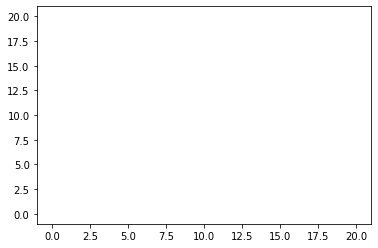

In [91]:
plot2DBinaryDataSet(X[:,:7],X[:,7:],xmin=-1,xmax=21, ymin=-1,ymax=21)


**Question:** In the last call of *plot2DBinaryDataSet*, I know that the first seven points are "good" and the 7 last points are "bad".  To be more general and robust, how can I access to the points of each class using the variable Y to get the same plot ? 

In [ ]:
# TODO : write your code here (and remove this comment)


In [110]:
def plotLine(u,b,xmin, xmax, ymin, ymax, linestyle = "-", color="k" ):
    """Plot a line in the "box" defined by xmin, xmax, ymin, ymax
    
    Args: 
        - u : The line is defined by its normal vector u, a numpy array of size 2
        - b : the constant term
        - the "box" is defined by xmin, xmax, ymin, ymax
        
    The line has the equation:     u[0]*x + u[1]*y + b = 0 
    """
    if u[1]==0:
        x=-b/u[0]
        plt.plot([x,x],[ymin,ymax])
    else:
        y1=(-b-u[0]*xmin)/u[1]
        y2=(-b-u[0]*xmax)/u[1]
        plt.plot([xmin,xmax],[y1,y2])
        plt.axis([xmin,xmax,ymin,ymax])
    

In [ ]:
help(plotLine)

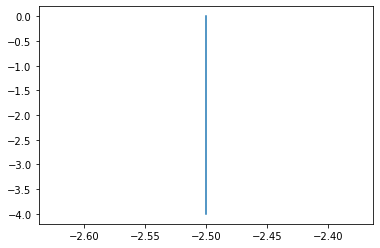

In [111]:
plotLine([2,0],5,1,10,-4,0)